In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(97)

In [2]:
saved_models_dir = "/global/scratch/users/aniketh/promoter_modelling/jax_data/saved_DEN_models_v8_TITAN/"
jax_data_dir = "/global/scratch/users/aniketh/promoter_modelling/jax_data/"

In [3]:
len(os.listdir(saved_models_dir))

70

In [4]:
all_configs = []
all_configs.append({
    "diversity_loss_coef": 1.0,
    "entropy_loss_coef": 1.0,
})
all_configs.append({
    "diversity_loss_coef": 5.0,
    "entropy_loss_coef": 5.0,
})
all_configs.append({
    "diversity_loss_coef": 10.0,
    "entropy_loss_coef": 10.0,
})

In [5]:
all_predicted_exps = {}
all_predicted_exps["designed_for"] = []
all_predicted_exps["sequence"] = []
all_predicted_exps["design_model"] = []
all_predicted_exps["diversity_loss_coef"] = []
all_predicted_exps["entropy_loss_coef"] = []

for cell in ["THP1", "Jurkat", "K562"]:
    all_predicted_exps[cell] = []

for model in sorted(os.listdir(os.path.join(jax_data_dir, "trained_predictors_final"))):
    for diff_exp_cell_ind, cell in enumerate(["THP1", "Jurkat", "K562"]):
        for config in all_configs:
            diversity_loss_coef = config["diversity_loss_coef"]
            entropy_loss_coef = config["entropy_loss_coef"]

            experiment_id = f"{cell}_using_{model}_div_coef_{diversity_loss_coef}_ent_coef_{entropy_loss_coef}"
            
            print(experiment_id)
            
            assert os.path.exists(os.path.join(saved_models_dir, experiment_id, "final_sequences.npy"))
            assert os.path.exists(os.path.join(saved_models_dir, experiment_id, "final_sequences_predicted_exps.npy"))
            
            final_sequences_predicted_exps = np.load(os.path.join(saved_models_dir, experiment_id, "final_sequences_predicted_exps.npy"))
            
            final_sequences = np.load(os.path.join(saved_models_dir, experiment_id, "final_sequences.npy"))
            final_sequences = np.argmax(final_sequences, axis=-1)
            final_sequences = np.vectorize({0: 'A', 1: 'C', 2: 'G', 3: 'T'}.get)(final_sequences)
            
            all_predicted_exps["designed_for"].extend([cell]*len(final_sequences_predicted_exps))
            all_predicted_exps["sequence"].extend(final_sequences)
            all_predicted_exps["design_model"].extend([model]*len(final_sequences_predicted_exps))
            all_predicted_exps["diversity_loss_coef"].extend([diversity_loss_coef]*len(final_sequences_predicted_exps))
            all_predicted_exps["entropy_loss_coef"].extend([entropy_loss_coef]*len(final_sequences_predicted_exps))
            
            for i, exp_cell in enumerate(["THP1", "Jurkat", "K562"]):
                all_predicted_exps[exp_cell].extend(final_sequences_predicted_exps[:, i])
                
all_predicted_exps = pd.DataFrame(all_predicted_exps)

THP1_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0
THP1_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0
THP1_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_10.0_ent_coef_10.0
Jurkat_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0
Jurkat_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0
Jurkat_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_10.0_ent_coef_10.0
K562_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0
K562_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0
K562_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_10.0_ent_coef_10.0
THP1_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0
THP1_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0
THP1_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_10.0_ent_coef_10.0
Jurkat_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0
Jurkat_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_5.0
Jurkat_using_coms_0.0

In [6]:
all_predicted_exps["sequence"] = all_predicted_exps.apply(lambda x: "".join(x["sequence"]), axis=1)

In [7]:
all_predicted_exps

,designed_for,sequence,design_model,diversity_loss_coef,entropy_loss_coef,THP1,Jurkat,K562
0,THP1,AGCAACACAACAGCTGCCGCCGCCGCCTCGTTGCGTAGCCTTTTTA...,coms_0.0003_THP1_weight_1.5.pkl,1.0,1.0,1.635909,-0.056743,0.064674
1,THP1,AGCAACACAACAGCTGCCGCCGCCGCCTCGTTGCGTAGCCTTTTTA...,coms_0.0003_THP1_weight_1.5.pkl,1.0,1.0,1.488516,-0.155744,-0.151003
2,THP1,AGCAACACAACAGCTGCCGCCGCCGCCTCGTTGCGTAGCCTTTTTA...,coms_0.0003_THP1_weight_1.5.pkl,1.0,1.0,1.441159,-0.169594,-0.029948
3,THP1,AGCAACACAACAGCTGCCGCCGCCGCCTCGTTGCGTAGCCTTTTTA...,coms_0.0003_THP1_weight_1.5.pkl,1.0,1.0,1.563897,-0.160307,0.077135
4,THP1,AGCAACACAACAGCTGCCGCCGCCGCCTCGTTGCGTAGCCTTTTTA...,coms_0.0003_THP1_weight_1.5.pkl,1.0,1.0,1.523573,-0.144224,0.024771
...,...,...,...,...,...,...,...,...
1079995,K562,TATAGATCCAACCAACCAGCTATCCAGTATCCCAGATATATTTCTC...,coms_0.0_THP1_weight_1.5.pkl,10.0,10.0,0.596791,0.478919,2.240547
1079996,K562,CCCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,coms_0.0_THP1_weight_1.5.pkl,10.0,10.0,0.634041,0.321209,2.031959
1079997,K562,CATCTCTTTTCCCTGATCCCATATCCAGCCAACCCCACCCCCCCCC...,coms_0.0_THP1_weight_1.5.pkl,10.0,10.0,0.722704,0.582654,2.126675
1079998,K562,TAATTAAATAAACTAACCAAACTAAAACACAAAACCTAAACCTAAA...,coms_0.0_THP1_weight_1.5.pkl,10.0,10.0,1.211102,1.831885,3.144641


THP1


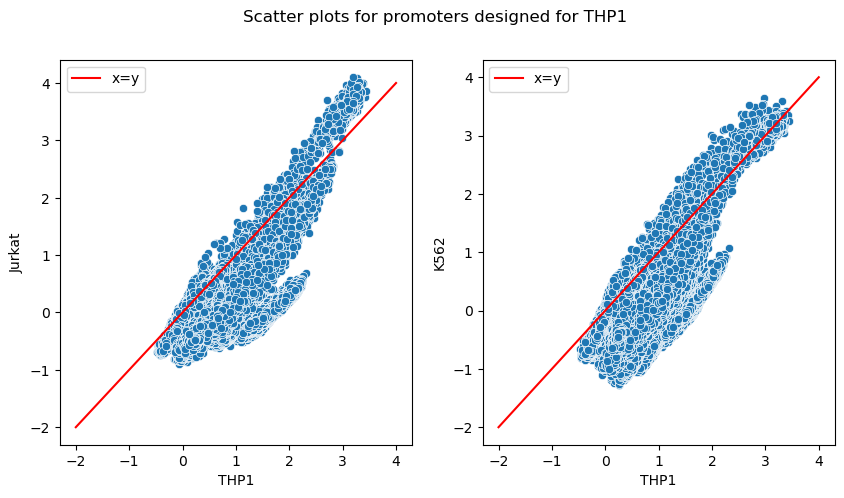

Jurkat


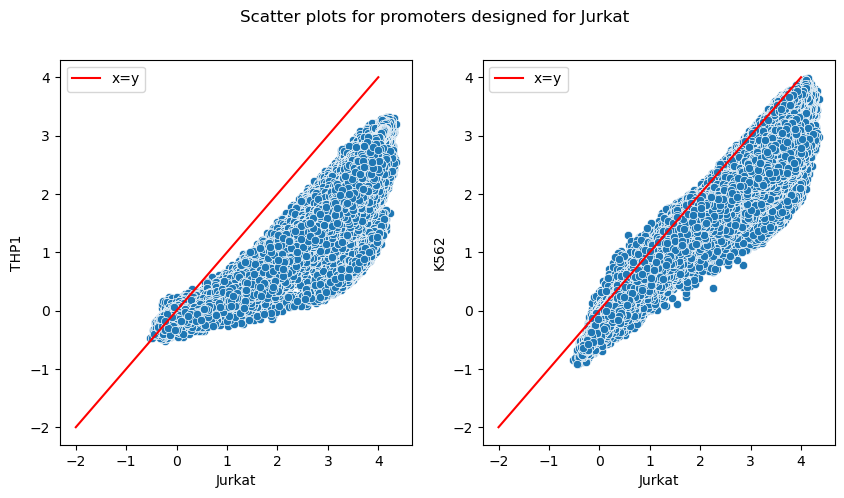

K562


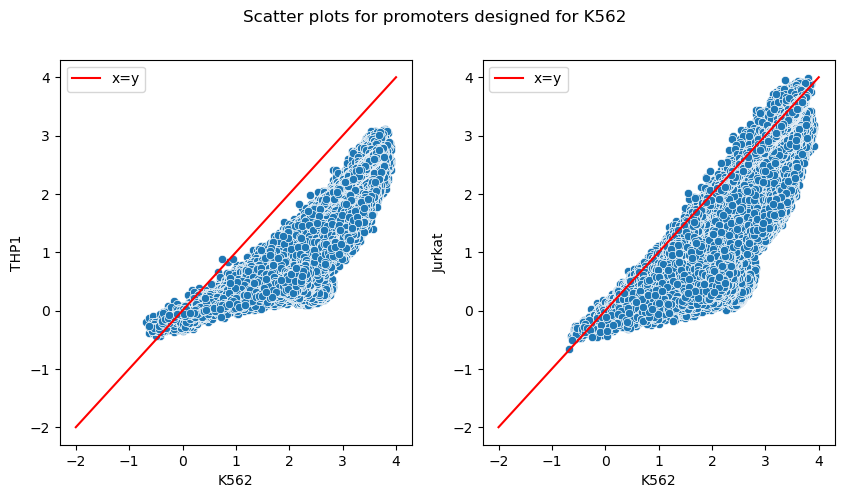

In [8]:
for cell in ["THP1", "Jurkat", "K562"]:
    print(cell)
    other_cells = [c for c in ["THP1", "Jurkat", "K562"] if c != cell]
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    for j, other_cell in enumerate(other_cells):
        sns.scatterplot(data=all_predicted_exps[all_predicted_exps["designed_for"] == cell].reset_index(drop=True), \
                        x=cell,
                        y=other_cell, \
                        ax=ax[j])
        ax[j].plot(np.linspace(-2, 4, 10), np.linspace(-2, 4, 10), color="r", label="x=y")
        ax[j].legend()
    fig.suptitle(f"Scatter plots for promoters designed for {cell}")
    plt.show()

In [9]:
# for cell in ["THP1", "Jurkat", "K562"]:
cell = "THP1"
print(cell)
other_cells = [c for c in ["THP1", "Jurkat", "K562"] if c != cell]

seqs_designed_for_cell = all_predicted_exps[all_predicted_exps["designed_for"] == cell].reset_index(drop=True)
seqs_designed_for_cell["max_diff"] = seqs_designed_for_cell[cell] - np.max(seqs_designed_for_cell[other_cells], axis=1)
seqs_designed_for_cell = seqs_designed_for_cell.sort_values(by="max_diff", ascending=False)

THP1


In [10]:
seqs_designed_for_cell

,designed_for,sequence,design_model,diversity_loss_coef,entropy_loss_coef,THP1,Jurkat,K562,max_diff
15231,THP1,AGCAACACAACAGCTGCCGCCGCCGCCTCGTTGCGTAGCCTTTTTA...,coms_0.0003_THP1_weight_1.5.pkl,1.0,1.0,1.656242,-0.039274,-0.041255,1.695516
10424,THP1,AGCAACACAACAGCTGCCGCCGCCGCCTCGTTGCGTAGCCTTTTTA...,coms_0.0003_THP1_weight_1.5.pkl,1.0,1.0,1.636912,-0.061271,-0.056256,1.693169
9851,THP1,AGCAACACAACAGCTGCCGCCGCCGCCTCGTTGCGTAGCCTTTTTA...,coms_0.0003_THP1_weight_1.5.pkl,1.0,1.0,1.608488,-0.085728,-0.077450,1.685938
2798,THP1,AGCAACACAACAGCTGCCGCCGCCGCCTCGTTGCGTAGCCTTTTTA...,coms_0.0003_THP1_weight_1.5.pkl,1.0,1.0,1.663361,-0.024871,-0.020677,1.684038
19529,THP1,AGCAACACAACAGCTGCCGCCGCCGCCTCGTTGCGTAGCCTTTTTA...,coms_0.0003_THP1_weight_1.5.pkl,1.0,1.0,1.583975,-0.109940,-0.099828,1.683804
...,...,...,...,...,...,...,...,...,...
59680,THP1,GGCGCGCGGCGGCGGCGCGGCGCCTTTTTTTCTTCTTCTTTCGCGG...,coms_0.0003_THP1_weight_1.5.pkl,10.0,10.0,3.195995,4.100641,3.333584,-0.904645
101926,THP1,CCTTCTCTCCTTTCTCCCTTCCTTCCTCTGCAAAGCAAAGCCTTTC...,coms_0.001_THP1_weight_1.5.pkl,10.0,10.0,1.356468,1.459382,2.263081,-0.906612
112241,THP1,AAGAAGAGGAAGGAAGCATCCATCCATCCATGCTTCTTTCCTTTTT...,coms_0.001_THP1_weight_1.5.pkl,10.0,10.0,2.020823,2.205461,2.970154,-0.949331
55511,THP1,CGTCGCGGCGCGGCGCGCGTCGCGGCGCCGGGGCGGGGGGCGACGC...,coms_0.0003_THP1_weight_1.5.pkl,10.0,10.0,2.706593,3.701767,2.846040,-0.995174


In [11]:
all_predicted_exps.to_parquet(os.path.join(jax_data_dir, "final_sequences_v8.parquet"), index=False)